## Dealing with missing Data


In [1]:
import pandas as pd
from io import StringIO

In [2]:
csv_data = '''A,B,C,D
            1.0,2.0,3.0,4.0
            5.0,6.0,,8.0
            10.0,11.0,12.0,'''

In [3]:
csv_data = unicode(csv_data)

In [4]:
df = pd.read_csv(StringIO(csv_data))

In [5]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


For a larger DataFrame, we can use the **isnull** method to return a DataFrame with Boolean values

In [6]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [7]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

### Eliminating samples or features with missing values

In [8]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [10]:
# only drop rows where all columns are NaN
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [11]:
# drop rows that have not at least 4 non-NaN values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [12]:
# Only drop rows where NaN appear in specific columns (here: 'C)
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### Imputing missing values
- Often, the removal of samples or dropping of entire feature columns is simply not feasible, because we might lose too much valuable data.
- **Mean imputation** is a technique where we simply replace the missing value by the mean value of the entire feature column.

In [13]:
from sklearn.preprocessing import Imputer


In [14]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

## Handling Categorical data


In [15]:
df = pd.DataFrame([
        ['green', 'M', 10.1, 'class1'],
        ['red', 'L', 13.5, 'class2'],
        ['blue', 'XL', 15.3, 'class1']
    ])

In [16]:
df.columns = ['color','size', 'price', 'classlabel' ]
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### Mapping ordinal features such as size

In [17]:
size_mapping = {
    'XL':3,
    'L':2,
    'M':1
}
df['size'] = df['size'].map(size_mapping)

In [18]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [19]:
inv_size_mapping = {v: k for k,v in size_mapping.items()}

In [20]:
df['size'] = df['size'].map(inv_size_mapping)

In [21]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### Encoding class labels

In [22]:
import numpy as np

In [23]:
class_mapping = { label:idx for idx, label 
                 in enumerate(np.unique(df['classlabel']))}

In [24]:
class_mapping

{'class1': 0, 'class2': 1}

In [25]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [26]:
df['size'] = df['size'].map(size_mapping)

In [27]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [28]:
inv_class_mapping = {v:k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [29]:
# Using LabelEncoder class
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()

In [30]:
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [31]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

### Performing one-hot encoding on nominal features

In [32]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()

In [34]:
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1L, 1L, 10.1],
       [2L, 2L, 13.5],
       [0L, 3L, 15.3]], dtype=object)

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [37]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0.0,1.0,0.0
1,13.5,2,0.0,0.0,1.0
2,15.3,3,1.0,0.0,0.0


## Partitioning a dataset in training and test sets

In [38]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium', 'Total phenols',
                  'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                  'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                  'Proline']

In [39]:
print 'Class labels', np.unique(df_wine['Class label'])

Class labels [1 2 3]


In [40]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

## Bringing features onto the same scale
- Feature scaling is a crucial step in **preprocessing** pipeline
- Decision trees and random forests are one of the very few machine learning algorithms where we don't need to worry about feature scaling

### 1. Normalization
$$x_{norm}^{(i)}= \frac{x^{(i)} - x_{min}}{x_{max}-x_{min}}$$


In [44]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

### 2. Standardization
$$x_{std}^{(i)}= \frac{x^{(i)} - \mu _{x}}{\sigma _{x}}$$

In [45]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Selecting meaningful features
- If we notice that a model performs much better on a training dataset than on the test dataset, this observation is a strong indicator for overfitting.
- we say that the model has a high variance

**Common solutions to reduce the generalization error**
- Collect more training data
- Introduce a penalty for complexity via regularization
- Choose a simpler model with fewer parameters
- Reduce the dimensionality of the data

### Sparse solutions with L1 reguralization
- Regularization consists of adding a penalty term to the cost function to encourage smaller weights or we penalize large weights

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print 'Training accuracy:', lr.score(X_train_std, y_train)

Training accuracy: 0.983870967742


In [48]:
print 'Test accuracy:', lr.score(X_test_std, y_test)

Test accuracy: 0.981481481481


In [49]:
lr.intercept_

array([-0.38381248, -0.15808936, -0.70038099])

In [50]:
lr.coef_

array([[ 0.27999685,  0.        ,  0.        , -0.02787893,  0.        ,
         0.        ,  0.710089  ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.2367555 ],
       [-0.6439458 , -0.06879305, -0.05719565,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92681319,
         0.06013386,  0.        , -0.37110904],
       [ 0.        ,  0.06147578,  0.        ,  0.        ,  0.        ,
         0.        , -0.63684679,  0.        ,  0.        ,  0.4984585 ,
        -0.35807588, -0.57032411,  0.        ]])

In [51]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


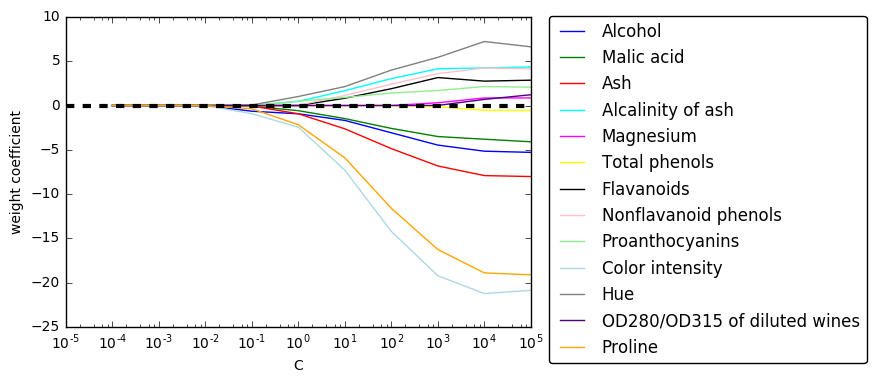

In [53]:
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
         'magenta', 'yellow', 'black',
         'pink', 'lightgreen', 'lightblue',
         'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1',
                           C = 10**c,
                           random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
            label=df_wine.columns[column+1],
            color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
         bbox_to_anchor=(1.38, 1.03),
         ncol=1, fancybox=True)
plt.show()

### Sequential feature selection algorithms
#### Sequential Backward Selection (SBS)
- Aims to reduce the dimensionality of the initial feature subspace with a minimum decay in performance of the classifier to improve upon computational efficiency.

In [54]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score

In [60]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test =train_test_split(X, y, 
                                    test_size=self.test_size,
                            random_state = self.random_state)
            
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test,
                                y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                                        X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

<__main__.SBS instance at 0x000000000D67A5C8>

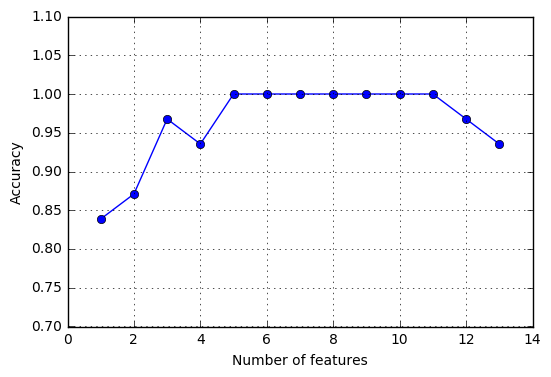

In [63]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [64]:
k5 = list(sbs.subsets_[8])
print df_wine.columns[1:][k5]

Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')


In [65]:
knn.fit(X_train_std, y_train)
print 'Training accuracy: ', knn.score(X_train_std, y_train)

Training accuracy:  0.983870967742


In [66]:
print 'Test accuracy:', knn.score(X_test_std, y_test)

Test accuracy: 0.944444444444


In [67]:
knn.fit(X_train_std[:, k5], y_train)
print 'Training accuracy:', knn.score(X_train_std[:, k5], y_train)

Training accuracy: 0.959677419355


In [68]:
print 'Test accuracy', knn.score(X_test_std[:, k5], y_test)

Test accuracy 0.962962962963
